In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
!pip install tools
import tools

In [3]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x1edb899b580>,
 'caps': [<matplotlib.lines.Line2D at 0x1edb899bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1edb899b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1edb89a7100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edb89a73d0>],
 'means': []}

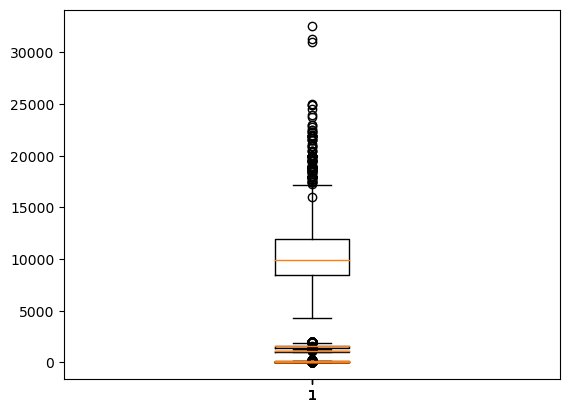

In [5]:
plt.boxplot(df["Price"])
plt.boxplot(df["Age_08_04"])
plt.boxplot(df["HP"])
plt.boxplot(df["cc"])
plt.boxplot(df["Gears"])
plt.boxplot(df["Doors"])
plt.boxplot(df["Quarterly_Tax"])
plt.boxplot(df["Weight"])

In [ ]:
sns.pairplot(df)

In [ ]:
plt.hist(df['Price'])

In [ ]:
plt.hist(df['Age_08_04'])

In [ ]:
plt.hist(df['HP'])

In [ ]:
plt.hist(df['Weight'])

In [ ]:
plt.hist(df['cc'])

In [ ]:
plt.hist(df['Doors'])

In [ ]:
plt.hist(df['Quarterly_Tax'])

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df.duplicated()]

In [ ]:
df.isna().sum()

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap = 'rainbow')

# Prearing model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [ ]:
model.params

In [ ]:
model.summary()

In [ ]:
model.tvalues , model.pvalues

In [ ]:
cc_model = smf.ols('Price~cc',data=df).fit()

In [ ]:
cc_model

In [ ]:
cc_model.summary()

In [ ]:
model_Doors = smf.ols('Price~Doors',data=df).fit()

In [ ]:
model_Doors.summary()

In [ ]:
model2 = smf.ols('Price~cc+Doors',data=df).fit()

In [ ]:
model2.summary()

In [ ]:
#Now plotting the influence plot a nd removing the most influential values
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [ ]:
##removing 80 and checking for significance
df1= df.drop(df.index[[80]],axis=0)

In [ ]:
mod_2= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= df1).fit()

In [ ]:
mod_2.summary()

In [ ]:
## door is insignificant

In [ ]:
## removing 80,221,960, where 960 is the next most influencing index after 80,221

In [ ]:
df2= df1.drop(df1.index[[80,221,960]],axis=0)

In [ ]:
mod_3= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df1).fit()

In [ ]:
mod_3.summary()

In [ ]:
## removing 80,221,960, where 960 is the next most influencing index after 80,2

In [ ]:
df3= df.drop(df.index[[80,221,960]],axis=0)

In [ ]:
mod_4= smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df3).fit()


In [ ]:
mod_4.summary() #88.5 increased accuracy

In [ ]:
## all the variables are significant
## As all the vaiables are significant, we select it as the final model

In [ ]:
finalmodel = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df3).fit()


In [ ]:
finalmodel.summary()### 0.885( r squared)

# Calculating vif

In [ ]:
r_Age_08_04=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
v_age=1/(1-r_Age_08_04)

r_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight+Weight',data=df).fit().rsquared
v_KM=1/(1-r_KM)

r_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight+Weight',data=df).fit().rsquared
v_HP=1/(1-r_HP)

r_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight+Weight',data=df).fit().rsquared
v_cc=1/(1-r_cc)

r_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight+Weight',data=df).fit().rsquared
v_Doors=1/(1-r_Doors)

r_Gears=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight+Weight',data=df).fit().rsquared
v_Gears=1/(1-r_Gears)

r_Quarterly_Tax=smf.ols('Quarterly_Tax~Weight+Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
v_Quarterly_Tax=1/(1-r_Quarterly_Tax)

r_Weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=df).fit().rsquared
v_Weight=1/(1-r_Weight)

In [ ]:
vif = pd.DataFrame({
    'Featiurs'  : ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    'VIF'       : [v_age,v_KM,v_HP,v_cc,v_Doors,v_Gears,v_Quarterly_Tax,v_Weight]
})
vif

In [ ]:
## As all the vaiables are significant, we select it as the final model.

In [ ]:
#Prediction for newdataw data
newdata = pd.DataFrame({
    'Age_08_04':[19],
    'KM':[70000],
    'HP':[90],
    'cc':[2700],
    'Doors':[4],
    'Gears':[6],
    'Quarterly_Tax':[200],
    'Weight':[1180]
})

In [ ]:
newdata

In [ ]:
finalmodel.predict(newdata)